In [ ]:
#Custom
from json_utils import read_jsonl
# Basci EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Customizing Plots
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [ ]:
twitter_data = read_jsonl("../data/dkpol_tweets.jsonl")
df_twitter = pd.DataFrame(twitter_data, columns=["text"])
df_pol = pd.read_csv("../data/folketinget_data/Forslag.json", usecols=["titel"])

df_pol = df_pol.rename(columns={"titel":"text"})

In [ ]:
print(df_twitter.head(), df_twitter.shape)
print(df_pol.head(), df_pol.shape)

# 1. Visualization
## 1.1 Data Distribution

In [ ]:
def plot_data_distribution(df1, df2, name1, name2):
    sns.barplot(x=[name1, name2], y=[len(df1), len(df2)])

In [ ]:
plot_data_distribution(df_twitter, df_pol, "Twitter", "Politics")

## 1.2 Text Character Length Distribution

In [6]:
def get_text_len(df):
    df["text_len"] = df["text"].apply(lambda x: len(x))
    return df

In [7]:
df_twitter = get_text_len(df_twitter)
df_pol = get_text_len(df_pol)

In [17]:
def plot_hist_boxplot(df, feature, title):
    fig = plt.figure(tight_layout=True, figsize=(18, 10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Histogram Texts Lengths")
    sns.distplot(df.loc[:, feature],
                hist=True,
                kde=True,
                ax=ax1,
                color="#e74c3c")
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax1.tick_params()

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))
    
    plt.suptitle(f'{title}', fontsize=24)

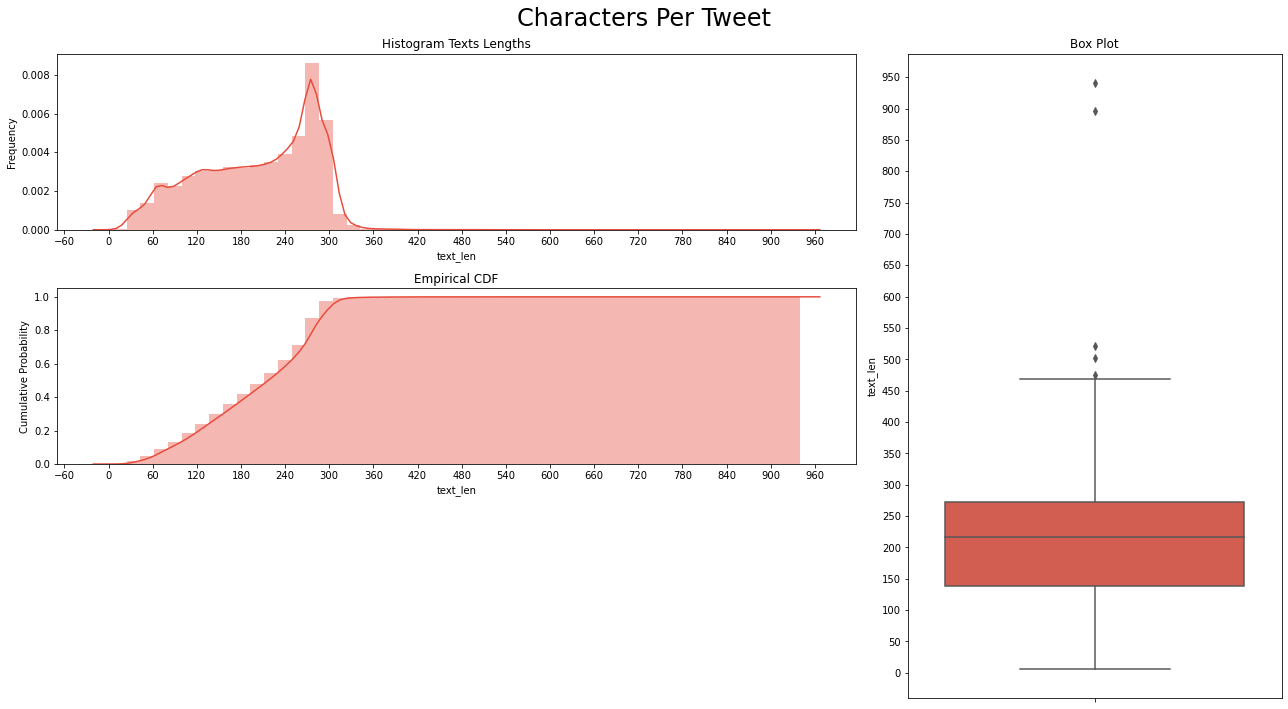

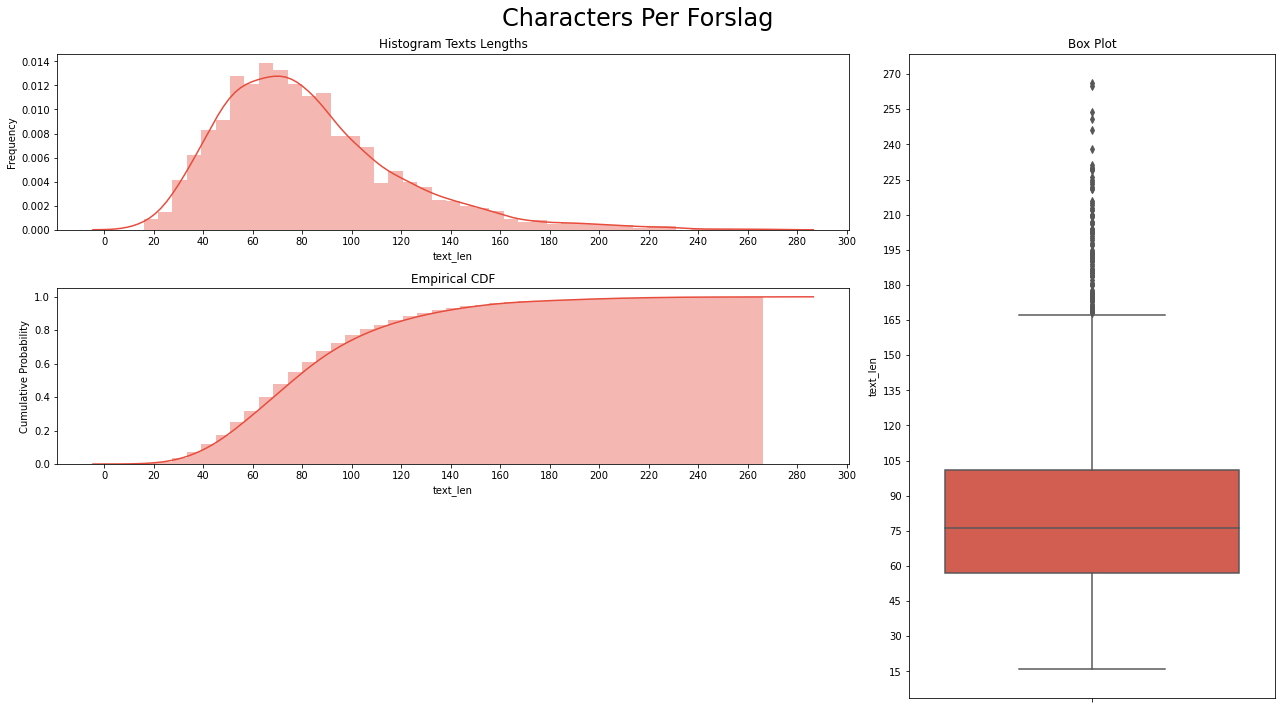

In [18]:
plot_hist_boxplot(df_twitter, "text_len", "Characters Per Tweet")
plot_hist_boxplot(df_pol, "text_len", "Characters Per Forslag")

# 1.3 Word Counts

In [19]:
def tokenize_on_spaces(df):
    df["tokens"] = df["text"].apply(lambda x: x.split())
    return df

In [20]:
df_twitter = tokenize_on_spaces(df_twitter)
df_pol = tokenize_on_spaces(df_pol)

In [21]:
def get_token_counts(df):
    df["token_counts"] = df["tokens"].apply(lambda x: len(x))
    return df

In [22]:
df_twitter = get_token_counts(df_twitter)
df_pol = get_token_counts(df_pol)

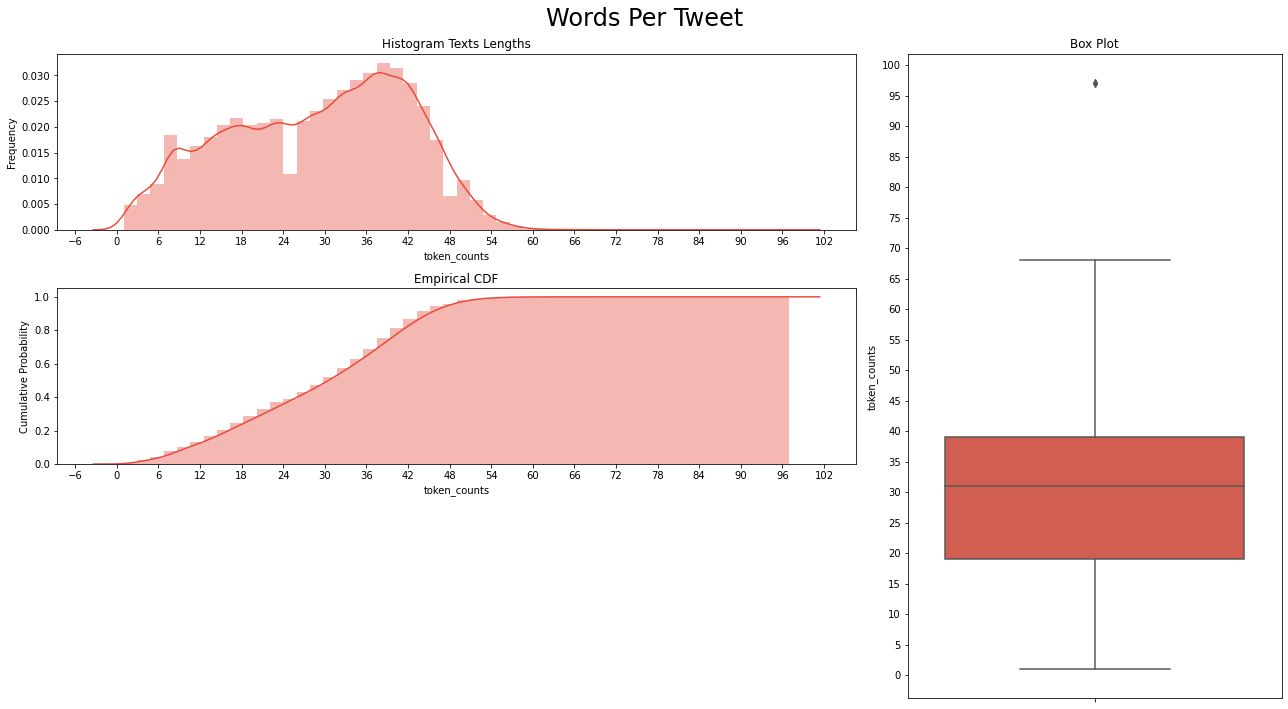

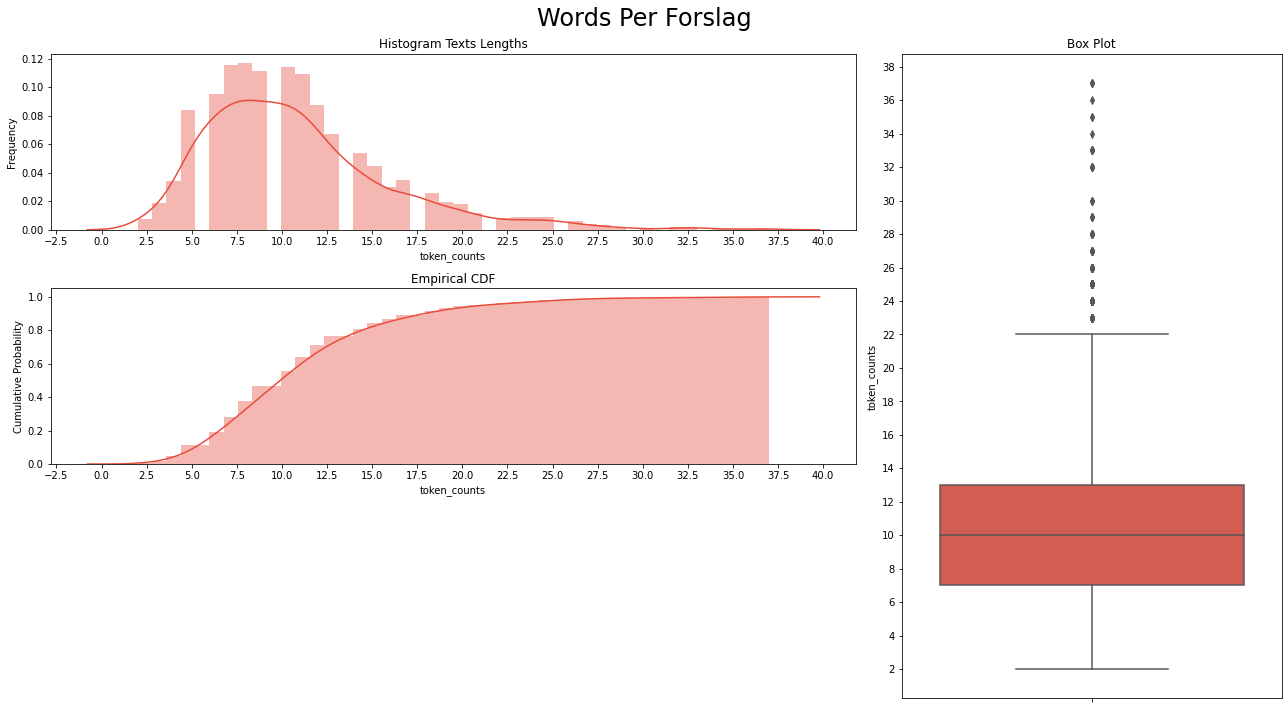

In [23]:
plot_hist_boxplot(df_twitter, "token_counts", "Words Per Tweet")
plot_hist_boxplot(df_pol, "token_counts", "Words Per Forslag")

## 1.4 Mean Word Lengths

In [24]:
def get_mean_word_length(df):
    df["mean"] = df["tokens"].apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    return df

In [27]:
df_twitter = get_mean_word_length(df_twitter)
df_pol = get_mean_word_length(df_pol)

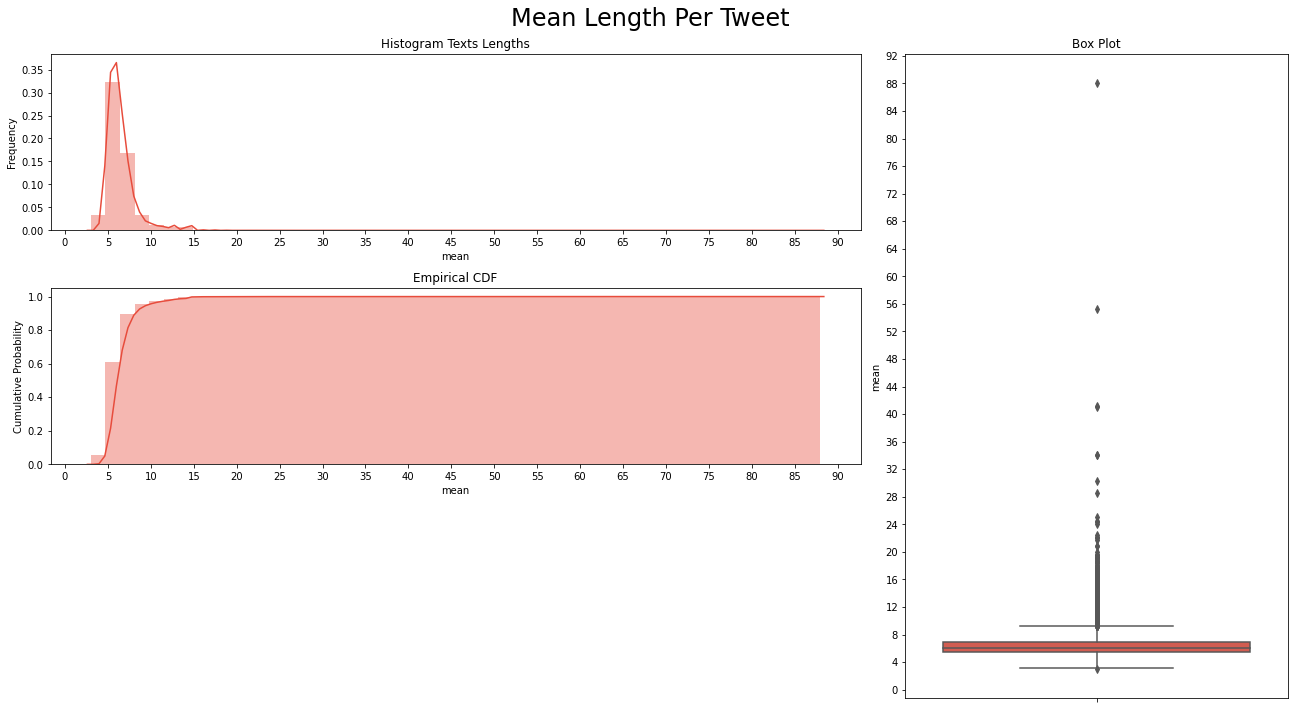

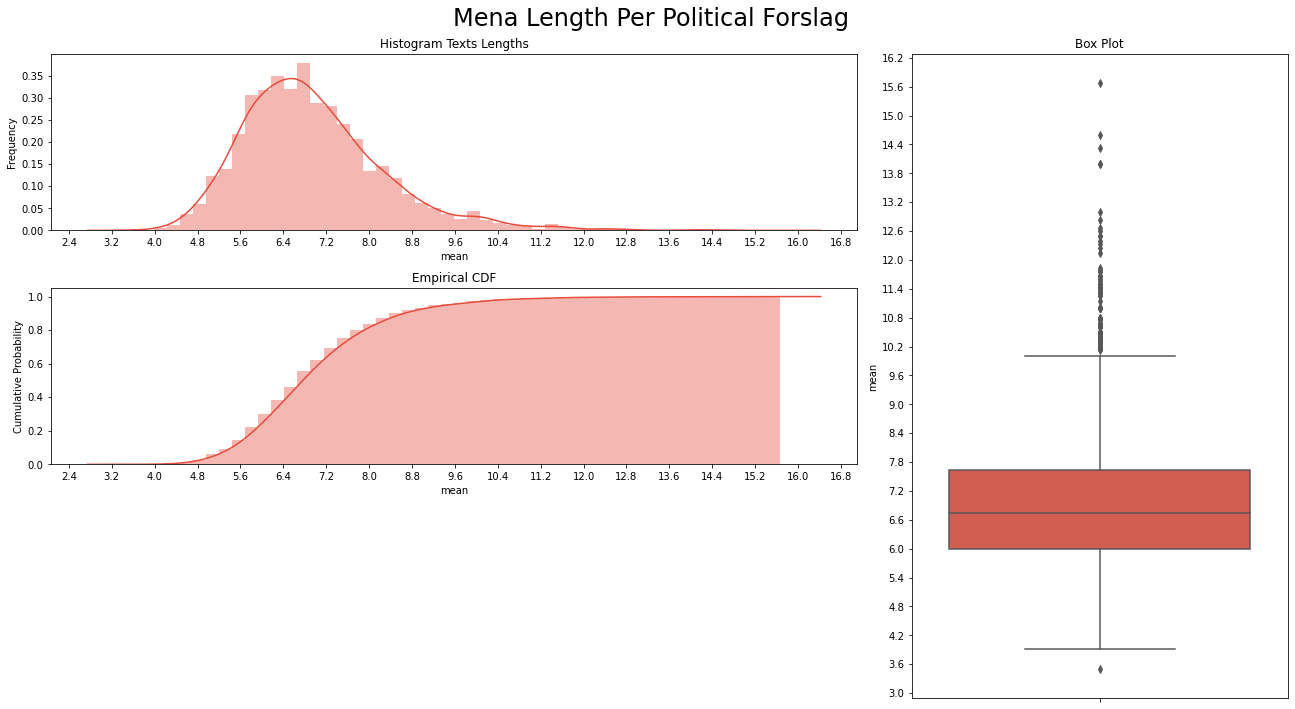

In [28]:
plot_hist_boxplot(df_twitter, "mean", "Mean Length Per Tweet")
plot_hist_boxplot(df_pol, "mean", "Mean Length Per Political Forslag")